In [ ]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Load the uploaded file

data = pd.read_csv("churn-bigml-80.csv")
data_test = pd.read_csv("churn-bigml-20.csv")

# Display the first few rows and basic information about the dataset
data_info = {
    "head": data.head(),
    "info": data.info(),
    "description": data.describe(include='all')
}

data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

{'head':   State  Account length  Area code International plan Voice mail plan  \
 0    KS             128        415                 No             Yes   
 1    OH             107        415                 No             Yes   
 2    NJ             137        415                 No              No   
 3    OH              84        408                Yes              No   
 4    OK              75        415                Yes              No   
 
    Number vmail messages  Total day minutes  Total day calls  \
 0                     25              265.1              110   
 1                     26              161.6              123   
 2                      0              243.4              114   
 3                      0              299.4               71   
 4                      0              166.7              113   
 
    Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
 0             45.07              197.4               99             16.78  

In [ ]:
# Pour afficher le nombre de lignes et de colonnes
data.shape

(2666, 20)

In [ ]:
data.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [ ]:
print("\nDuplicate Rows:", data.duplicated().sum())


Duplicate Rows: 0


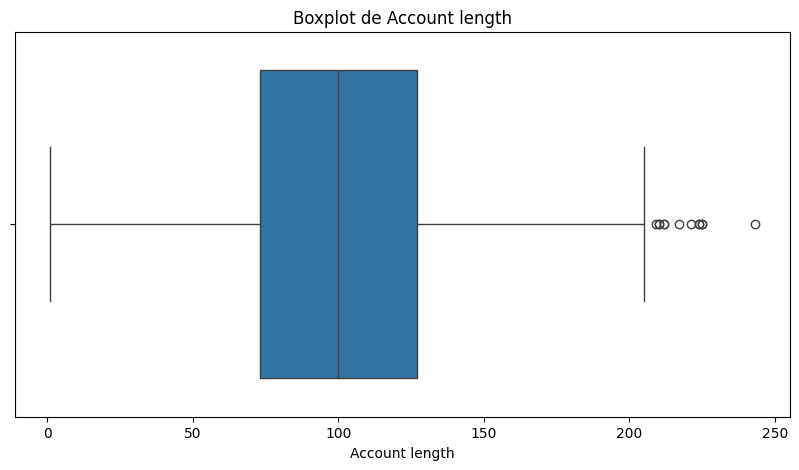

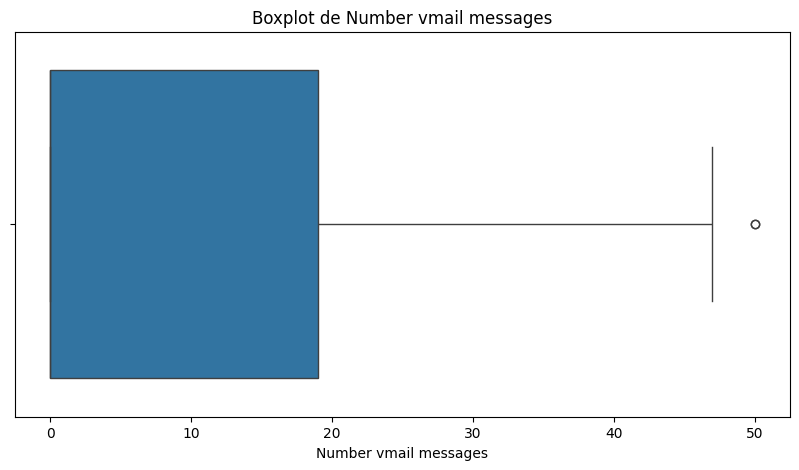

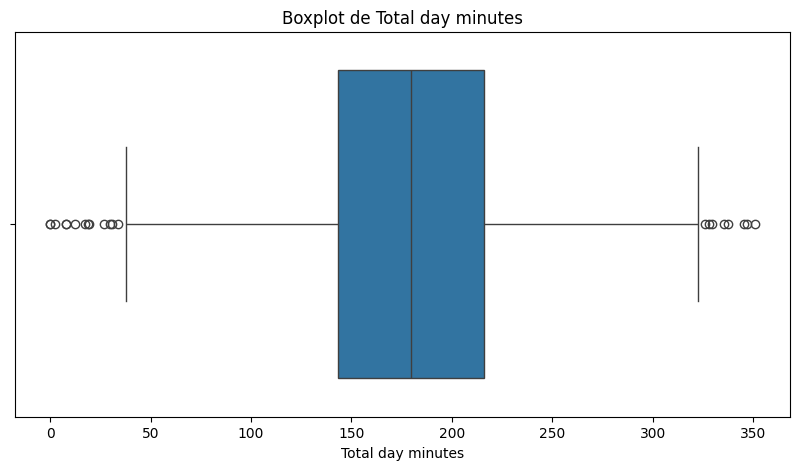

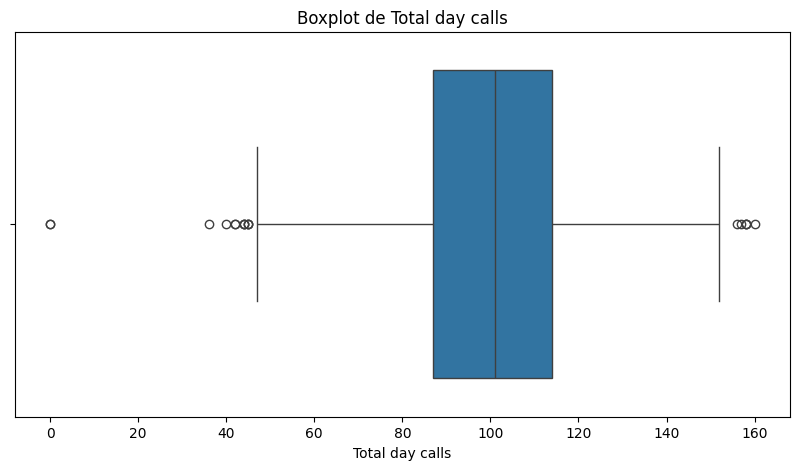

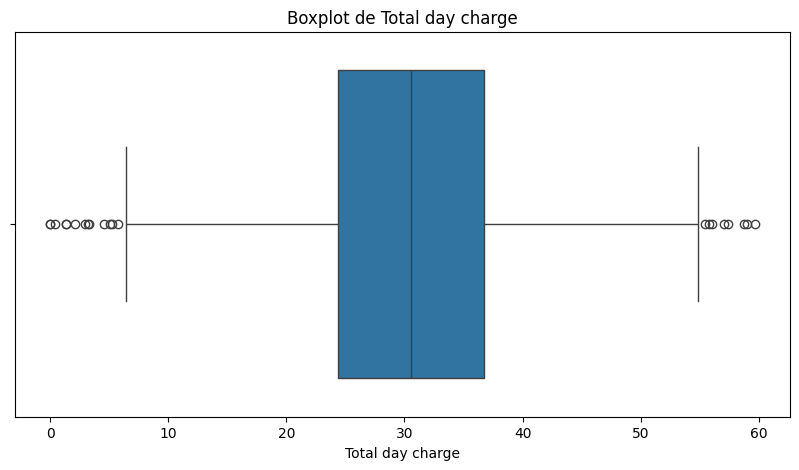

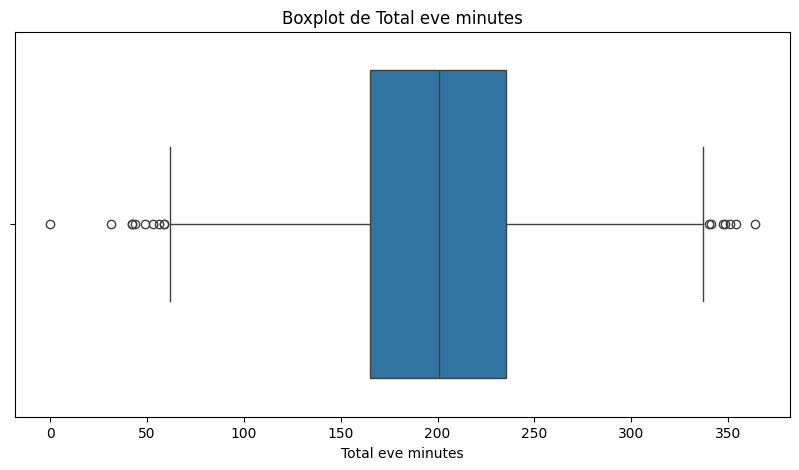

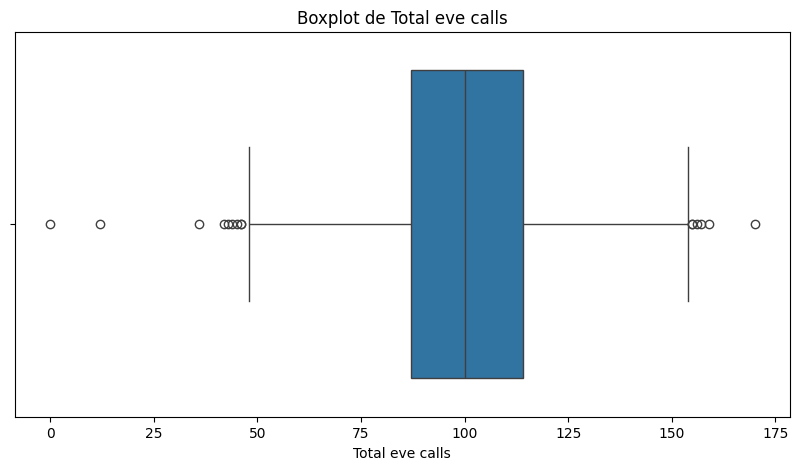

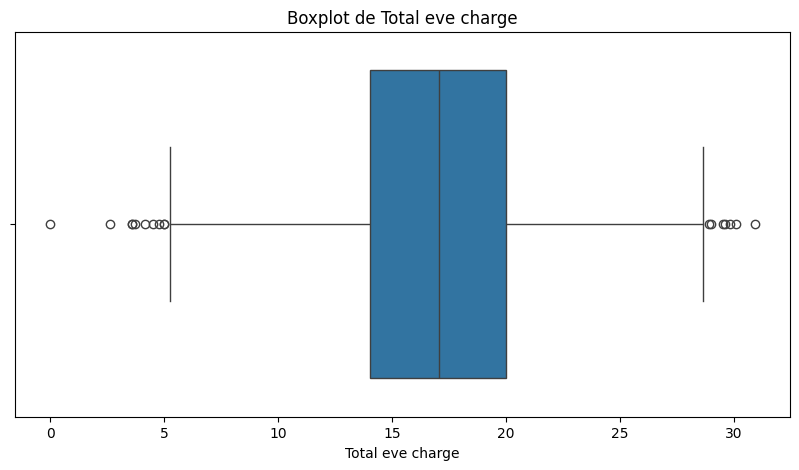

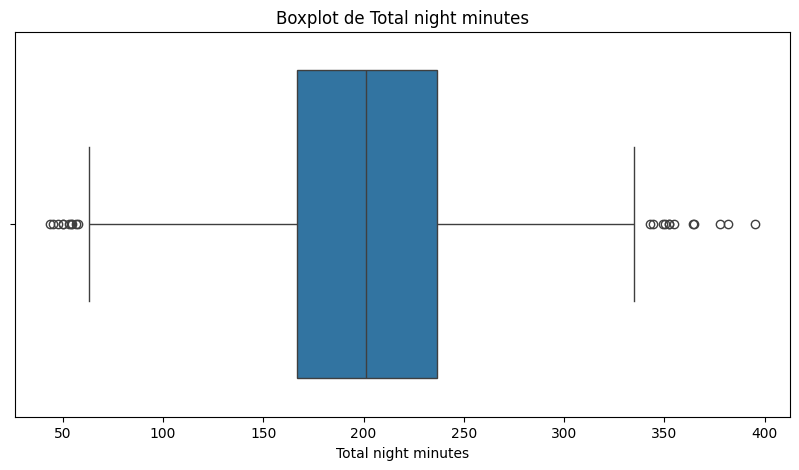

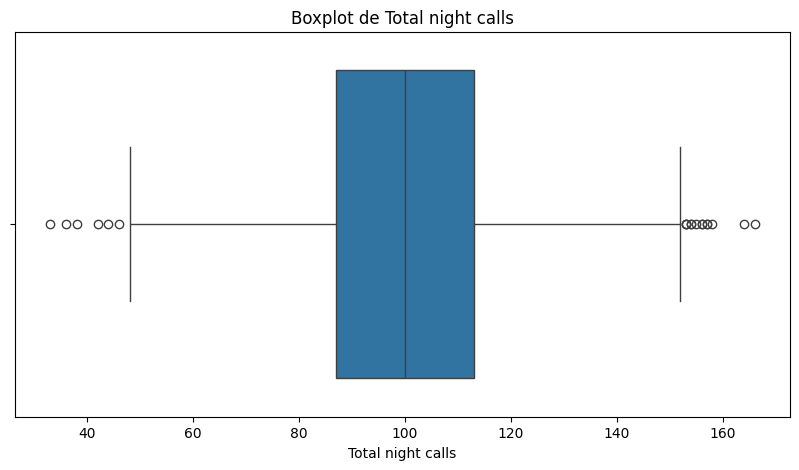

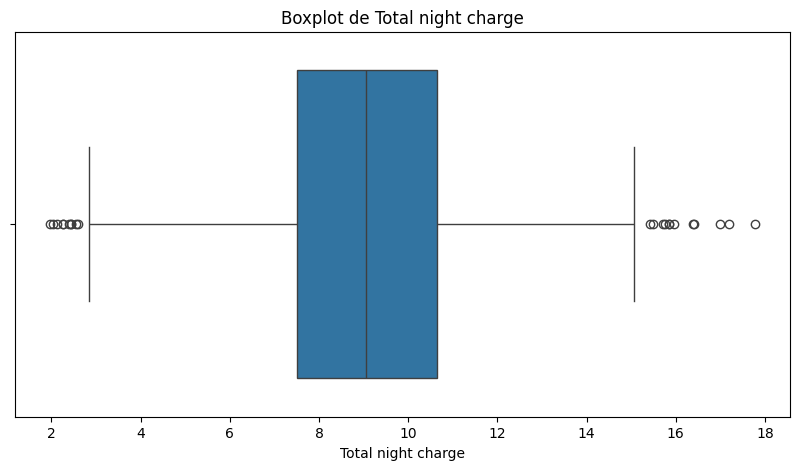

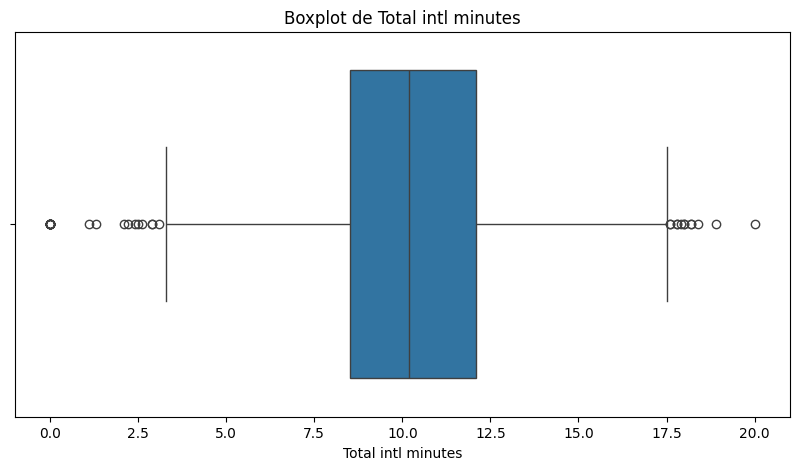

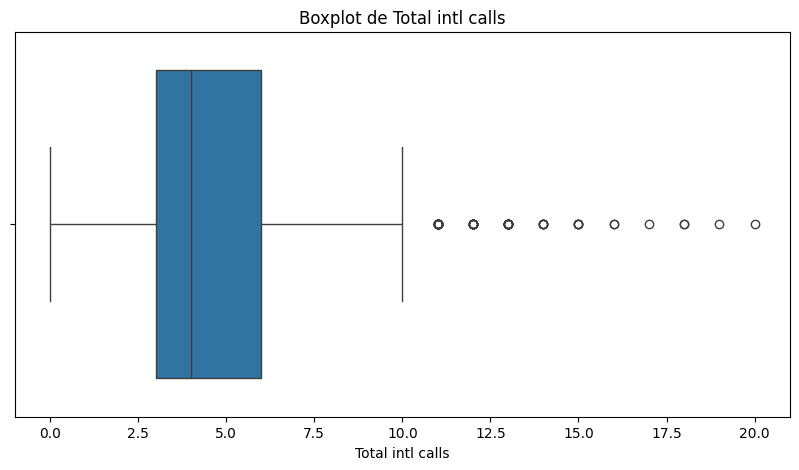

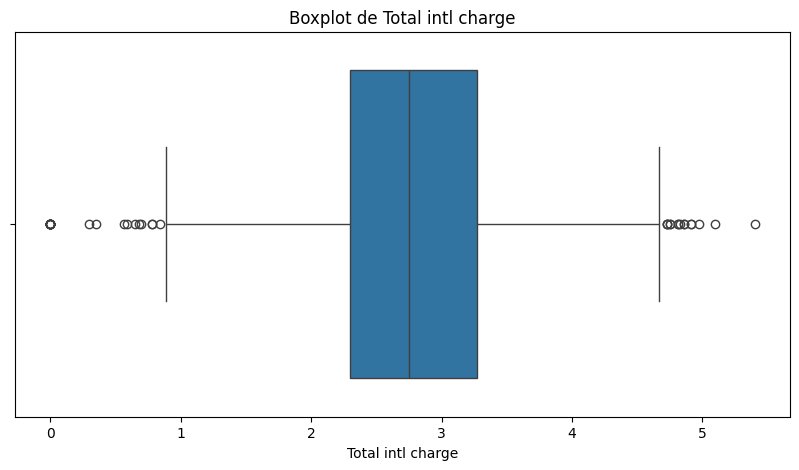

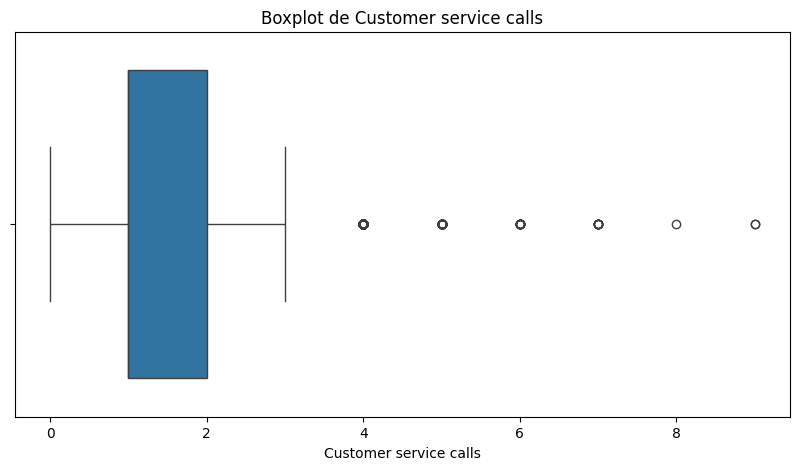

In [ ]:
columns = [
    'Account length','Number vmail messages', 'Total day minutes', 'Total day calls',
    'Total day charge', 'Total eve minutes', 'Total eve calls',
    'Total eve charge', 'Total night minutes', 'Total night calls',
    'Total night charge', 'Total intl minutes', 'Total intl calls',
    'Total intl charge', 'Customer service calls'
]

# Boucle pour afficher un boxplot pour chaque colonne
for col in columns:
    plt.figure(figsize=(10, 5))  # Taille de la figure
    sns.boxplot(data=data[col], orient='h')  # Boxplot horizontal
    plt.title(f'Boxplot de {col}')  # Titre du graphique
    plt.xlabel(col)  # Label de l'axe des x
    plt.show()  # Affiche le graphique

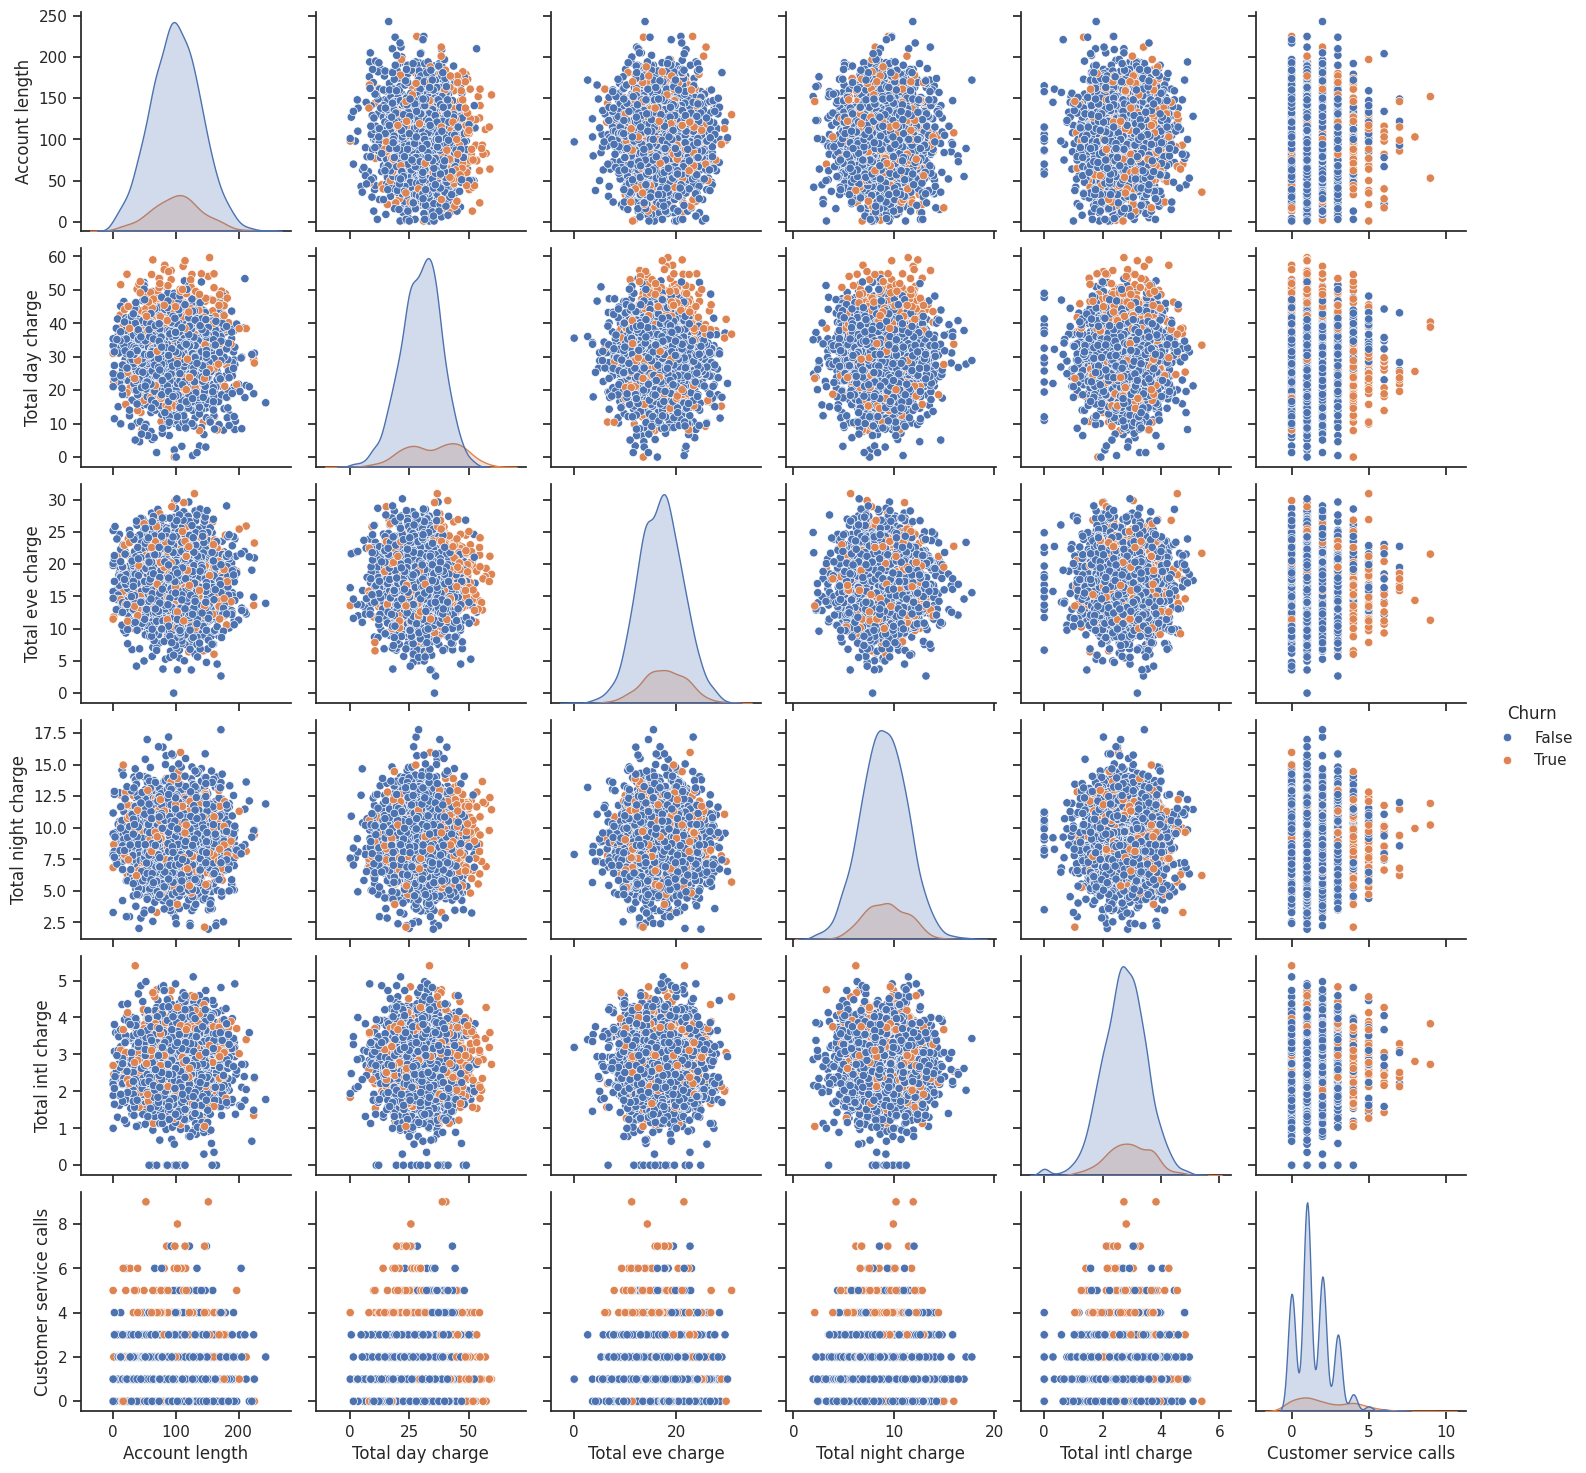

In [ ]:
listSns = ['Account length', 'Total day charge', 'Total eve charge','Total night charge','Total intl charge','Customer service calls','Churn']
sns.set(style='ticks')
sns.pairplot(data[listSns], hue = 'Churn')

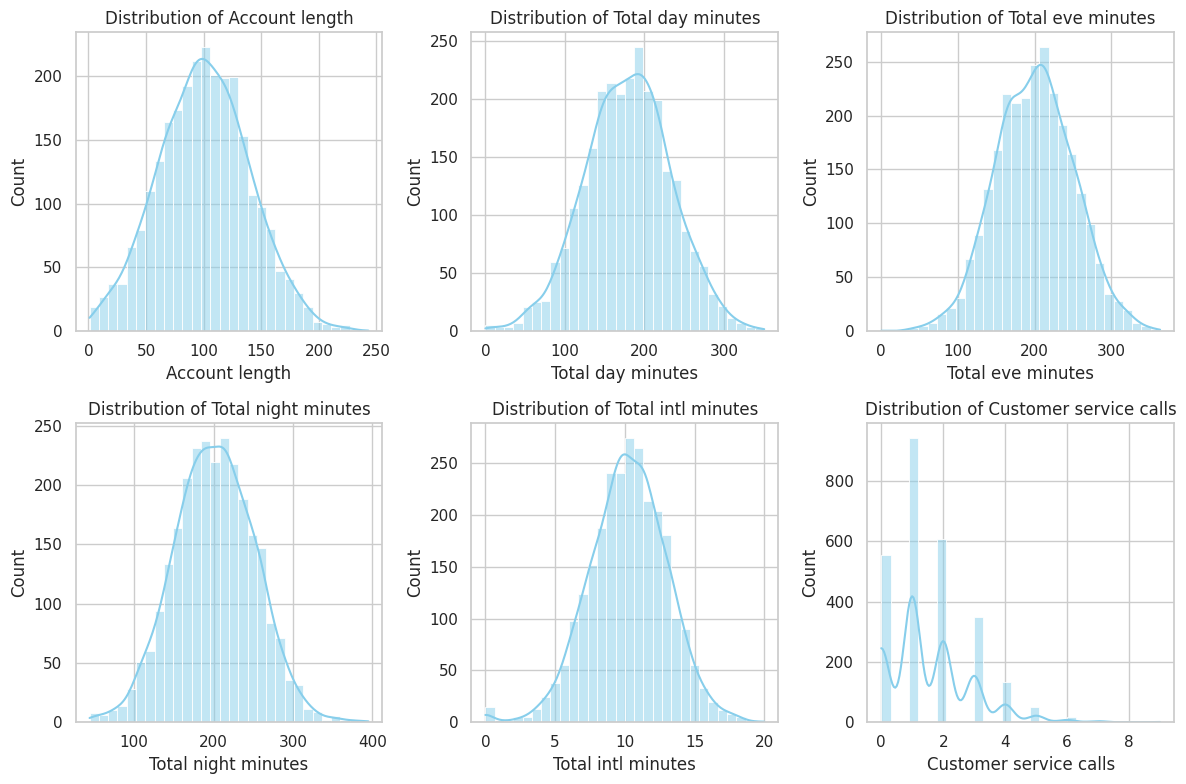

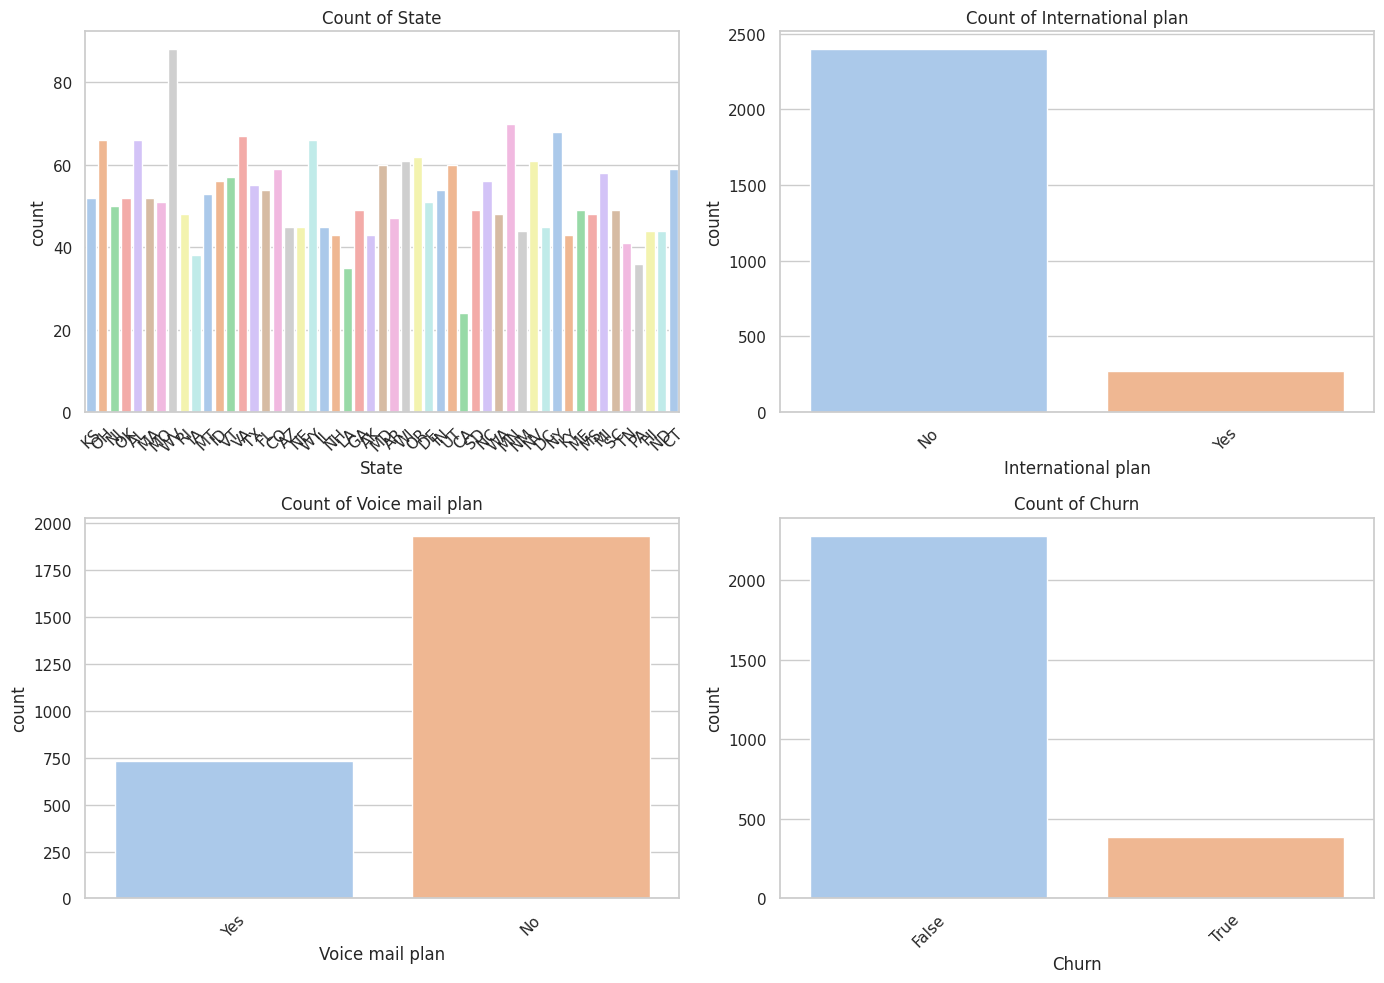

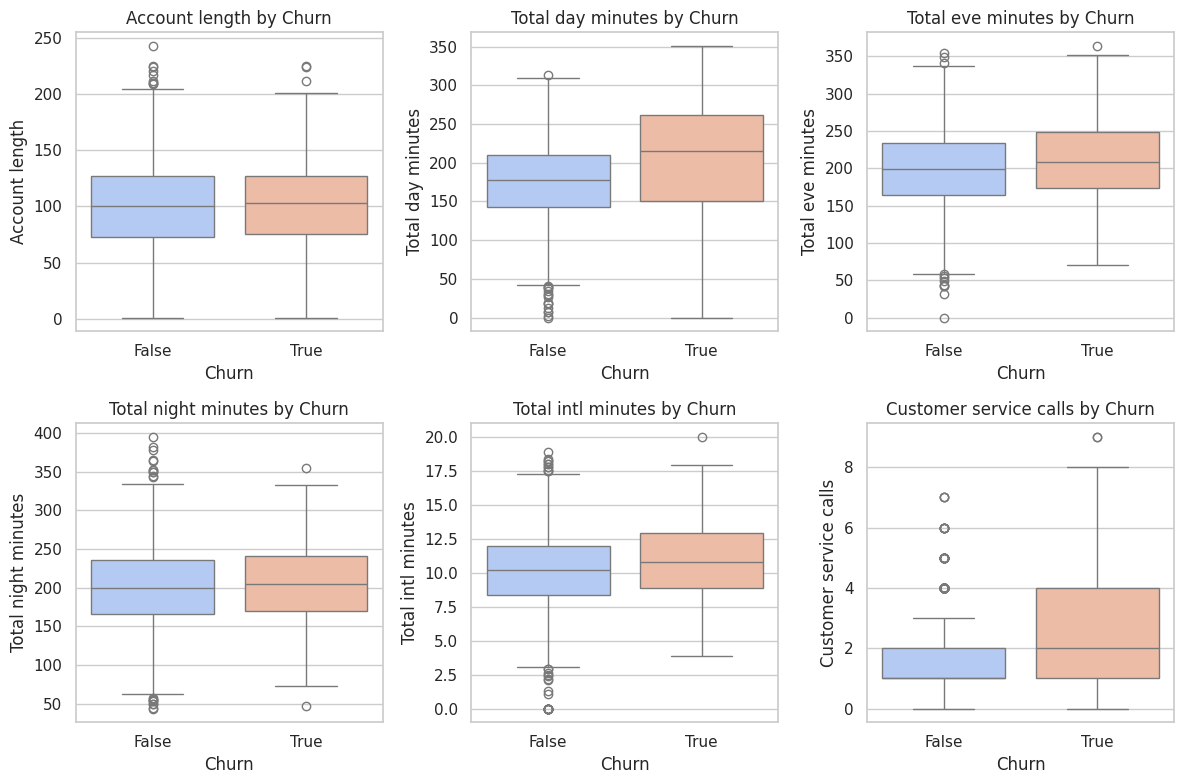

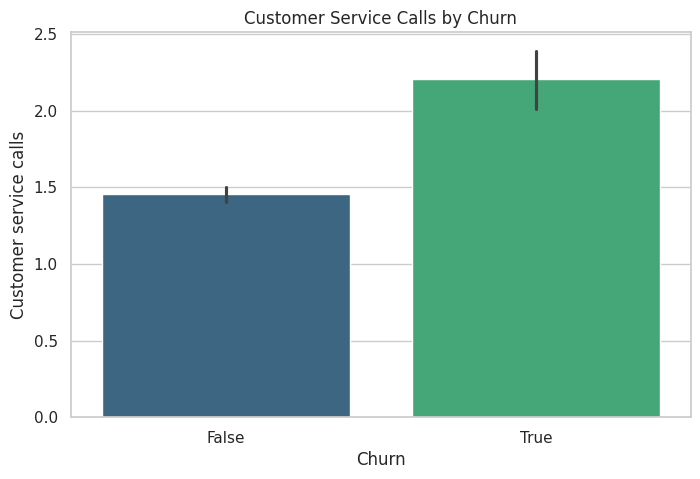

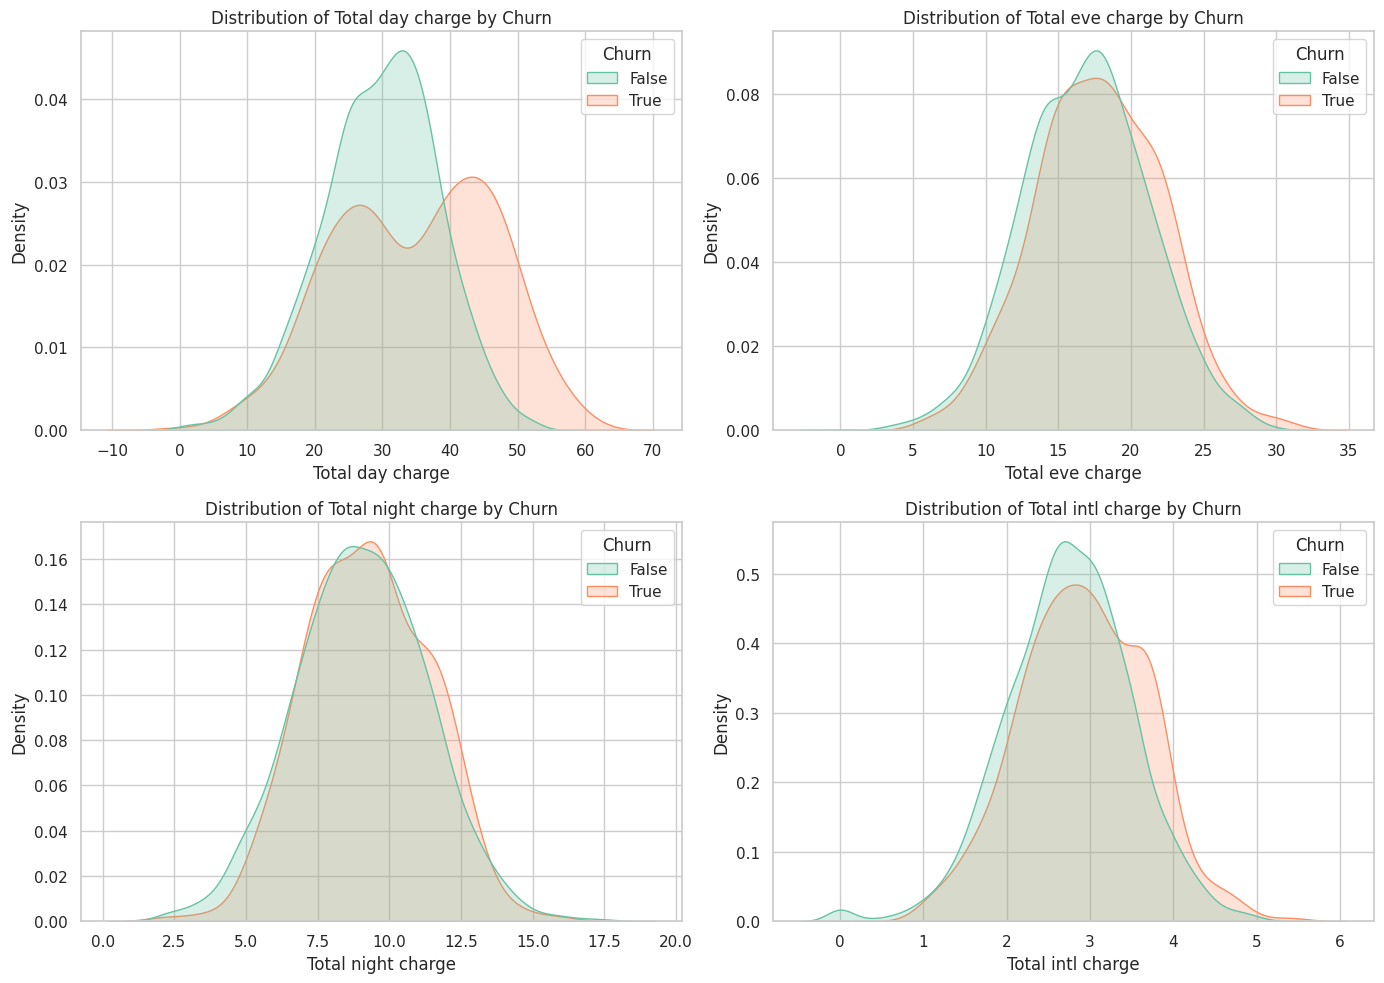


Exploration Complete! Key visualizations are displayed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles for the plots
sns.set_theme(style="whitegrid")


# --- 2. Univariate Analysis ---

# Plot distribution of numerical variables
numerical_columns = [
    "Account length", "Total day minutes", "Total eve minutes",
    "Total night minutes", "Total intl minutes", "Customer service calls"
]

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

# --- 3. Categorical Variables ---

# Count plots for categorical variables
categorical_columns = ["State", "International plan", "Voice mail plan", "Churn"]

plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=data, x=column, palette="pastel")
    plt.xticks(rotation=45)
    plt.title(f"Count of {column}")
plt.tight_layout()
plt.show()

# --- 4. Bivariate Analysis ---

# Churn vs. numerical features (boxplots)
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, x="Churn", y=column, palette="coolwarm")
    plt.title(f"{column} by Churn")
plt.tight_layout()
plt.show()


# --- 6. Insights from Churn ---

# Barplot for customer service calls and churn
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x="Churn", y="Customer service calls", palette="viridis")
plt.title("Customer Service Calls by Churn")
plt.show()

# Distribution of total charges for churned vs. non-churned customers
total_charge_columns = [
    "Total day charge", "Total eve charge",
    "Total night charge", "Total intl charge"
]

plt.figure(figsize=(14, 10))
for i, column in enumerate(total_charge_columns, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=data, x=column, hue="Churn", fill=True, common_norm=False, palette="Set2")
    plt.title(f"Distribution of {column} by Churn")
plt.tight_layout()
plt.show()

# --- Summary ---
print("\nExploration Complete! Key visualizations are displayed.")


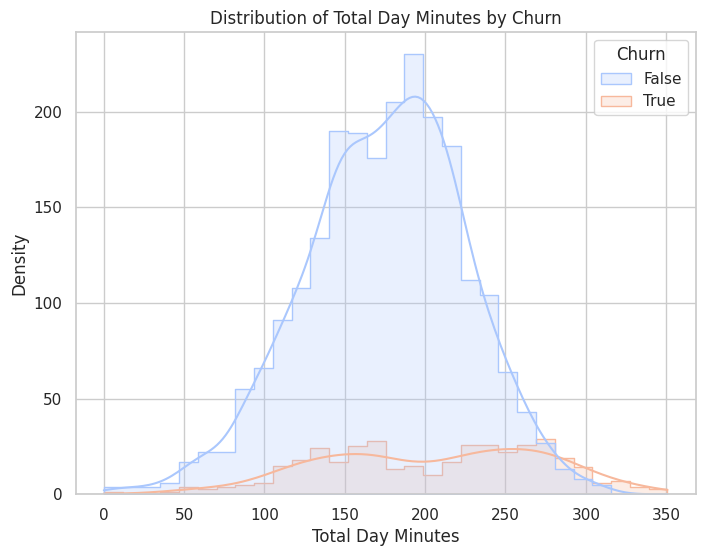

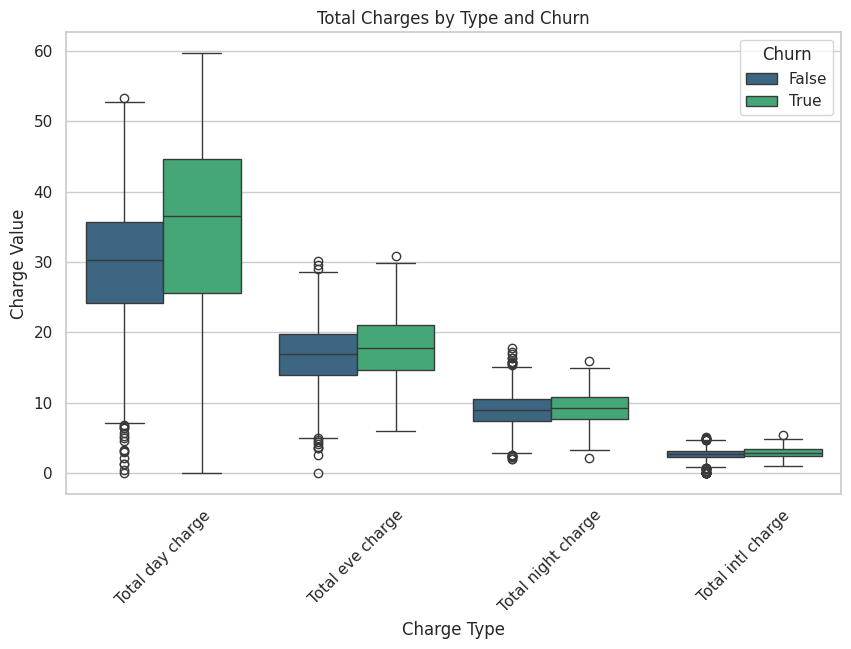

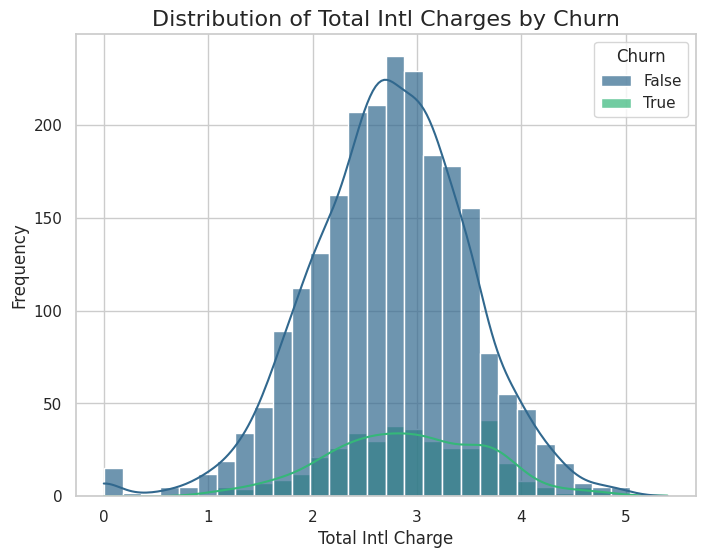

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Distribution of Total Day Minutes by Churn
plt.figure(figsize=(8, 6))
sns.histplot(data, x='Total day minutes', hue='Churn', kde=True, palette='coolwarm', bins=30, element='step')
plt.title("Distribution of Total Day Minutes by Churn")
plt.xlabel("Total Day Minutes")
plt.ylabel("Density")
plt.show()

#  Boxplot for Total Charges by Churn
total_charges = data[['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge', 'Churn']]
total_charges_melted = total_charges.melt(id_vars='Churn', var_name='Charge Type', value_name='Charge Value')

plt.figure(figsize=(10, 6))
sns.boxplot(data=total_charges_melted, x='Charge Type', y='Charge Value', hue='Churn', palette='viridis')
plt.title("Total Charges by Type and Churn")
plt.xticks(rotation=45)
plt.ylabel("Charge Value")
plt.xlabel("Charge Type")
plt.show()

# 2. Distribution of International Charges by Churn
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="Total intl charge", hue="Churn", kde=True, bins=30, palette="viridis", alpha=0.7)
plt.title("Distribution of Total Intl Charges by Churn", fontsize=16)
plt.xlabel("Total Intl Charge")
plt.ylabel("Frequency")
plt.show()


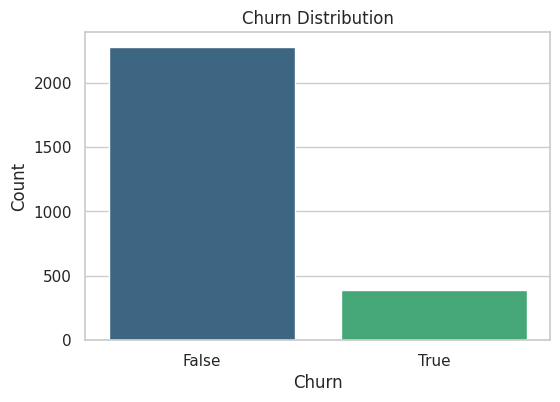

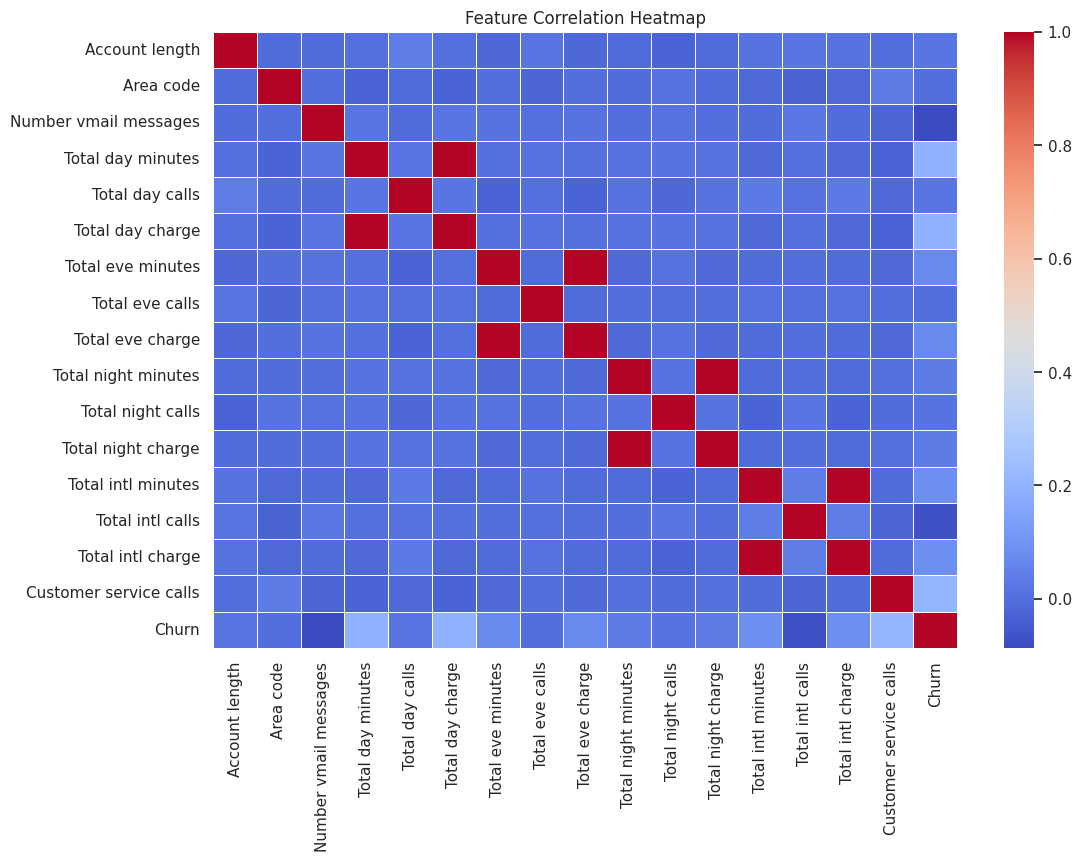

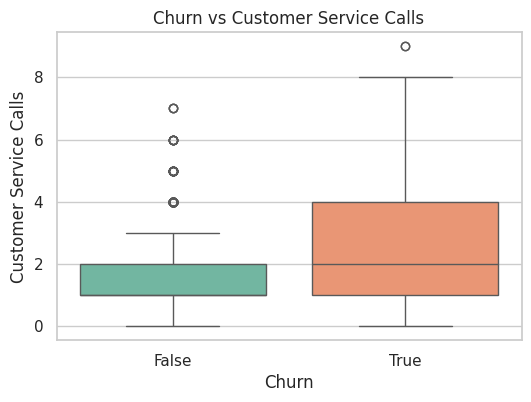

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=data['Churn'], palette='viridis')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

#  Correlation heatmap
# The 'numeric_only=True' argument is added to calculate correlations only for numeric columns
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#  Churn vs Customer Service Calls
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['Churn'], y=data['Customer service calls'], palette='Set2')
plt.title("Churn vs Customer Service Calls")
plt.xlabel("Churn")
plt.ylabel("Customer Service Calls")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Encoding categorical variables
label_encoder = LabelEncoder()
data['International plan'] = label_encoder.fit_transform(data['International plan'])
data['Voice mail plan'] = label_encoder.fit_transform(data['Voice mail plan'])
data['Churn'] = label_encoder.fit_transform(data['Churn'])


data_test['International plan'] = label_encoder.fit_transform(data_test['International plan'])
data_test['Voice mail plan'] = label_encoder.fit_transform(data_test['Voice mail plan'])
data_test['Churn'] = label_encoder.fit_transform(data_test['Churn'])




# Préparation des features et de la cible
X_train = data.drop(columns=['State', 'Churn'], axis=1)
y_train = data['Churn']

X_test = data_test.drop(columns=['State', 'Churn'], axis=1)
y_test = data_test['Churn']



# Step 4: Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Vérification des données après prétraitement
print("First 5 rows of scaled X_train:", X_train_scaled[:5])
print("First 5 values of y_train:", y_train[:5].values)


First 5 rows of scaled X_train: [[ 0.69216332 -0.52781119 -0.33569005  1.62391742  1.24750838  1.57966959
   0.48486775  1.57994234 -0.05861885 -0.05078123 -0.05844549  0.85740344
  -0.46903104  0.85670695 -0.0850203  -0.59752673 -0.08568137 -0.42917241]
 [ 0.16127783 -0.52781119 -0.33569005  1.62391742  1.32098526 -0.32991809
   1.13537472 -0.3301935  -0.0959162   0.14765447 -0.09539655  1.04845815
   0.14905361  1.04929318  1.24217895 -0.59752673  1.24292063 -0.42917241]
 [ 0.91968567 -0.52781119 -0.33569005 -0.61579486 -0.58941354  1.17930193
   0.68502374  1.179465   -1.55443885  0.49491694 -1.55496337 -0.75966782
   0.20056066 -0.75839118  0.7041252   0.21689365  0.69819381 -1.19195484]
 [-0.42016819 -0.69246654  2.97893841 -0.61579486 -0.58941354  2.21250879
  -1.46665316  2.21267484 -2.71850874 -0.59647939 -2.71892171 -0.08408263
  -0.57204515 -0.08433938 -1.30460879  1.03131404 -1.30799521  0.33361002]
 [-0.64769054 -0.52781119  2.97893841 -0.61579486 -0.58941354 -0.23582246
  

In [ ]:
# import pandas as pd
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.compose import ColumnTransformer

# categorical_features = ['International plan', 'Voice mail plan']
# numerical_features = ['Account length', 'Total day minutes', 'Total eve minutes',
#                        'Total night minutes', 'Total intl minutes', 'Customer service calls',
#                        'Total day charge', 'Total eve charge', 'Total night charge',
#                        'Total intl charge']
# # Preprocessing for numerical features
# numerical_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())
# ])

# # Preprocessing for categorical features
# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Combine preprocessing steps
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# # Create the main pipeline
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', KNeighborsClassifier())
# ])

# # Assuming you have your data in 'X' (features) and 'y' (target)
# X = data.drop(columns=['State', 'Churn'], axis=1)
# y = data['Churn']
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the pipeline
# pipeline.fit(X_train, y_train)

# # Make predictions
# y_pred_knn = pipeline.predict(X_test)

# # Evaluate the model (e.g., using accuracy_score, classification_report)
# from sklearn.metrics import accuracy_score, classification_report
# print("Accuracy:", accuracy_score(y_test, y_pred_knn))
# print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))



Accuracy: 0.775112443778111

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86       572
           1       0.36      0.76      0.49        95

    accuracy                           0.78       667
   macro avg       0.66      0.77      0.67       667
weighted avg       0.87      0.78      0.80       667



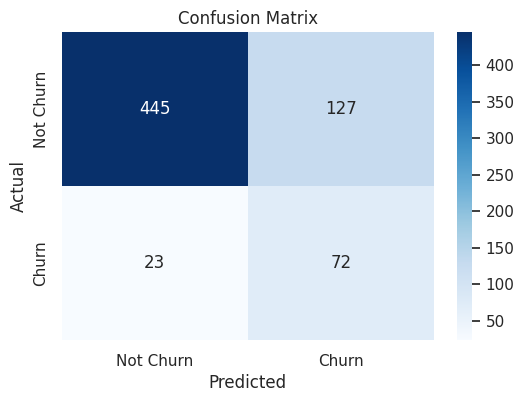

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, class_weight='balanced')

# Train the model
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_predd = logistic_model.predict(X_test_scaled)
y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_predd))
print("\nClassification Report:\n", classification_report(y_test, y_predd))

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_predd)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
variances = X_train.var()
print(variances)

Account length            1565.308011
Area code                 1808.036973
International plan           0.091053
Voice mail plan              0.199424
Number vmail messages      185.294086
Total day minutes         2938.762071
Total day calls            399.526628
Total day charge            84.929733
Total eve minutes         2596.056893
Total eve calls            406.483869
Total eve charge            18.756385
Total night minutes       2578.641241
Total night calls          377.076533
Total night charge           5.221771
Total intl minutes           7.774888
Total intl calls             6.032893
Total intl charge            0.566726
Customer service calls       1.719339
dtype: float64


## Logistic Regression

Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
Variables Selected: ['Account length' 'Area code' 'International plan' 'Voice mail plan'
 'Number vmail messages' 'Total day minutes' 'Total day calls'
 'Total day charge' 'Total eve minutes' 'Total eve calls'
 'Total eve charge' 'Total night minutes' 'Total night calls'
 'Total night charge' 'Total intl minutes' 'Total intl calls'
 'Total intl charge' 'Customer service calls']
Variables Removed: []
Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7736131934032984

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.78      0.85       572
           1       0.36      0.76      0.49        95

    accuracy                           0.77       667
   macro avg       0.66      0.77      0.67       667
weighted avg       0.87      0.77      0.80       667



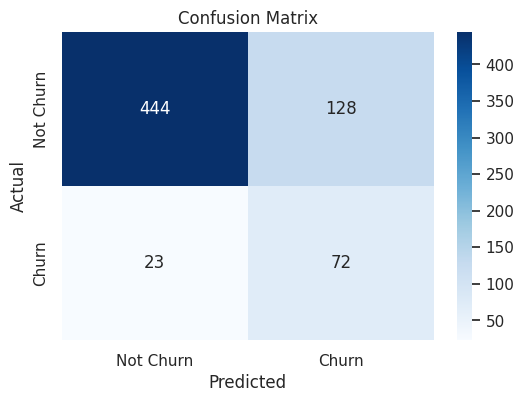

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Feature Selection with VarianceThreshold
sel = VarianceThreshold(threshold=0.4)
sel.fit(X_train_scaled)

# Print selected and removed features
selected_features = sel.get_support()
print("Selected Features:", selected_features)
print("Variables Selected:", np.array(X_train.columns)[selected_features])
print("Variables Removed:", np.array(X_train.columns)[~selected_features])

# Transform datasets
X_train_selected = sel.transform(X_train_scaled)
X_test_selected = sel.transform(X_test_scaled)

# Step 2: Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid_search = GridSearchCV(
    LogisticRegression(random_state=42, class_weight='balanced'),
    param_grid,
    cv=5
)
grid_search.fit(X_train_selected, y_train)

# Best model
best_model = grid_search.best_estimator_

# Step 3: Model evaluation
y_pred = best_model.predict(X_test_selected)
y_pred_proba = best_model.predict_proba(X_test_selected)[:, 1]

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# courbe roc et auc
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

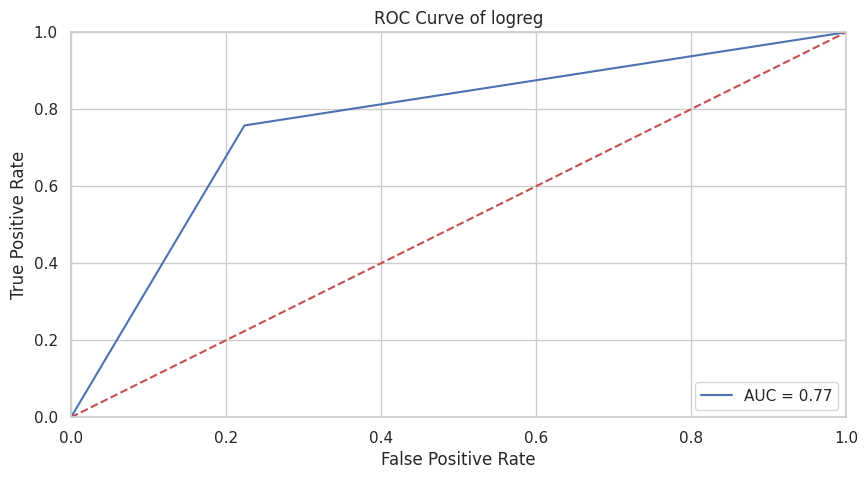

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of logreg')
plt.grid(True)
plt.show()

## Random Forest

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9550224887556222

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       572
           1       0.95      0.73      0.82        95

    accuracy                           0.96       667
   macro avg       0.95      0.86      0.90       667
weighted avg       0.95      0.96      0.95       667



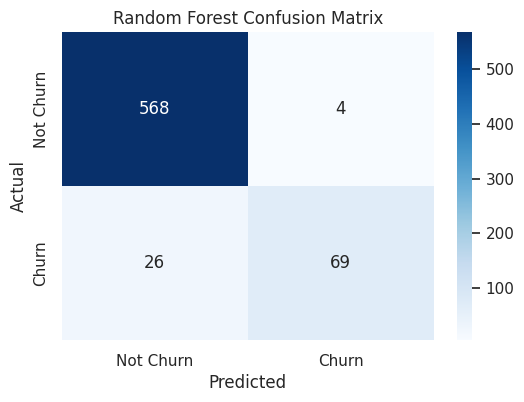

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Step 2: Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5)
grid_search_rf.fit(X_train_scaled, y_train)  # Train with scaled data (no SMOTE)

# Best model
best_rf_model = grid_search_rf.best_estimator_

# Step 3: Model evaluation
y_pred_rf = best_rf_model.predict(X_test_scaled)
y_pred_proba_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]

print("Best Parameters:", grid_search_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix visualization
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)


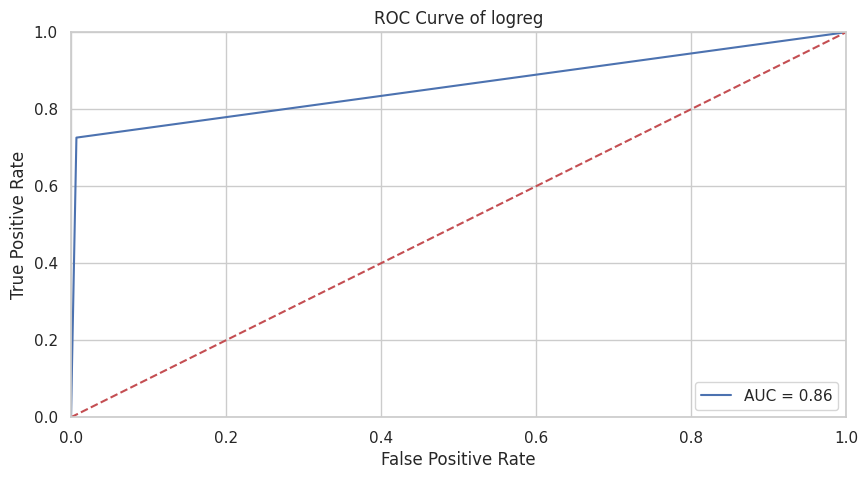

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of logreg')
plt.grid(True)
plt.show()

## Feature Selection with Random Forest

In [ ]:
importances = best_rf_model.feature_importances_
importances

array([0.03350635, 0.00834541, 0.08741861, 0.01661287, 0.02596106,
       0.12259158, 0.03590793, 0.12672882, 0.06622024, 0.02986164,
       0.06395206, 0.04272941, 0.03306169, 0.0416411 , 0.0426302 ,
       0.05282735, 0.04773029, 0.12227341])

In [ ]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
sorted_idx = np.argsort(importances)
features = ['Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls']
features_arr = np.asarray(features)

In [ ]:
len(X_train_scaled)

2666

Text(0.5, 1.0, 'Variable importance')

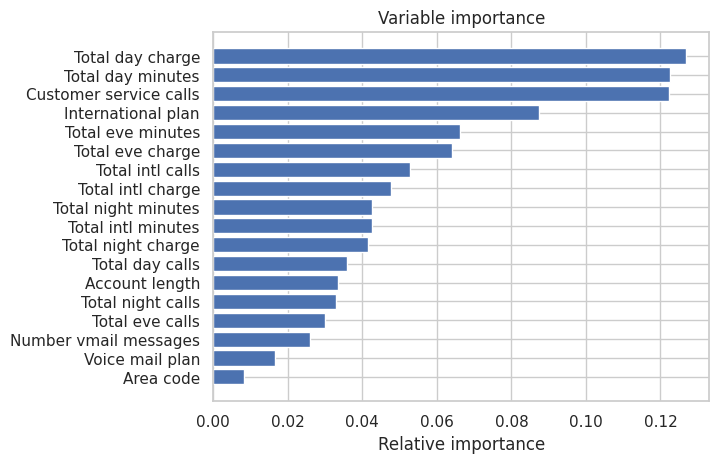

In [ ]:
padding=np.arange(X_train_scaled.size/len(X_train_scaled))
plt.barh(padding,importances[sorted_idx],align='center')
plt.yticks(padding,features_arr[sorted_idx])
plt.xlabel('Relative importance')
plt.title('Variable importance')

## SVM


Best Parameters: {'C': 100, 'gamma': 0.01}
Accuracy: 0.9355322338830585

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       572
           1       0.86      0.65      0.74        95

    accuracy                           0.94       667
   macro avg       0.90      0.82      0.85       667
weighted avg       0.93      0.94      0.93       667



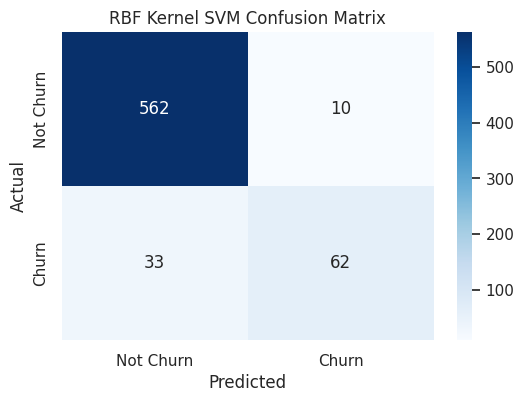

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Initialize SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Step 2: Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]  # Kernel coefficient
}
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_scaled, y_train)  # Train with scaled data

# Best model
best_svm_model = grid_search_svm.best_estimator_

# Step 3: Model evaluation
y_pred_svm = best_svm_model.predict(X_test_scaled)
y_pred_proba_svm = best_svm_model.predict_proba(X_test_scaled)[:, 1]

print("Best Parameters:", grid_search_svm.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion matrix visualization
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title("RBF Kernel SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)

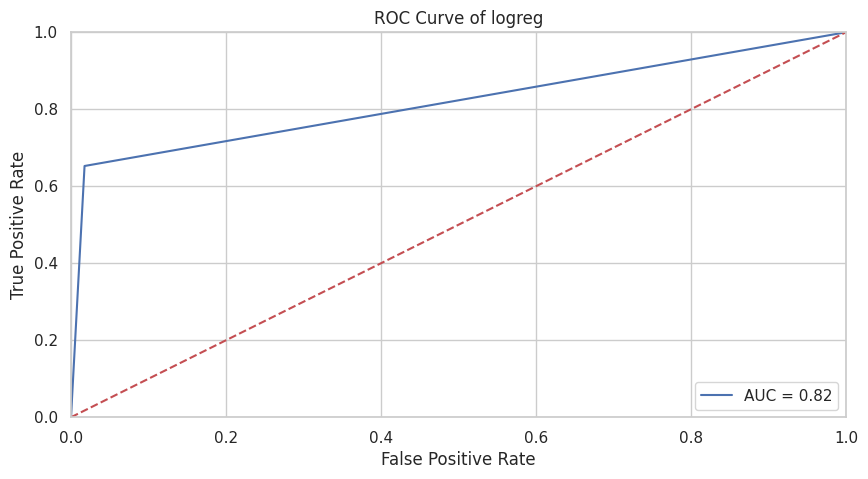

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of logreg')
plt.grid(True)
plt.show()


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Accuracy: 0.9610194902548725

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       572
           1       0.95      0.77      0.85        95

    accuracy                           0.96       667
   macro avg       0.96      0.88      0.91       667
weighted avg       0.96      0.96      0.96       667



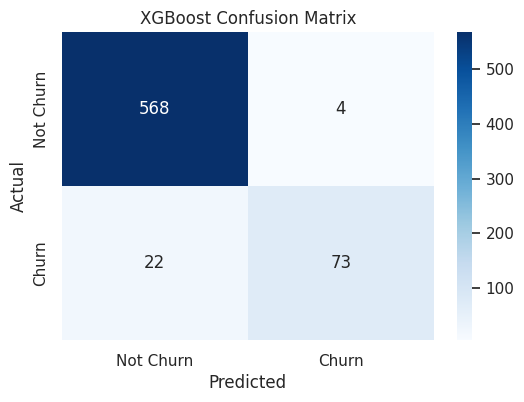

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Step 2: Hyperparameter tuning using GridSearchCV
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train_scaled, y_train)

# Best model
best_xgb_model = grid_search_xgb.best_estimator_

# Step 3: Model evaluation
y_pred_xgb = best_xgb_model.predict(X_test_scaled)
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test_scaled)[:, 1]

print("\nBest Parameters:", grid_search_xgb.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion matrix visualization
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(fpr, tpr)

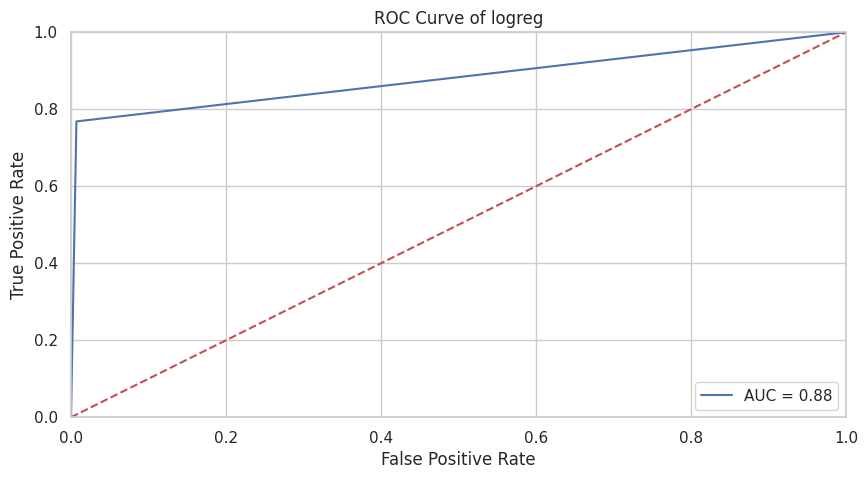

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of logreg')
plt.grid(True)
plt.show()

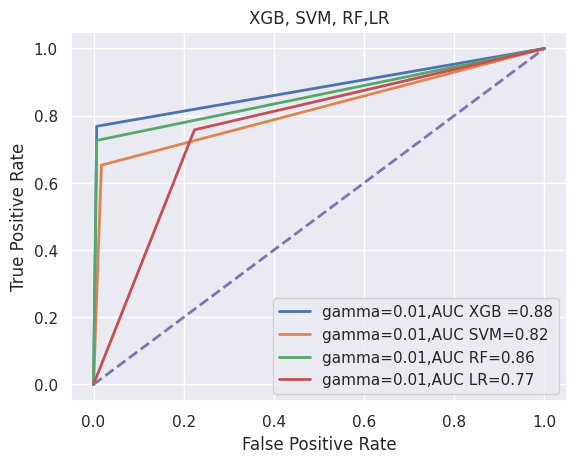

In [ ]:
from sklearn import metrics
sns.set()

fpr,tpr,thr = metrics.roc_curve(y_test,y_pred_xgb)
fpr2,tpr2,thr2 = metrics.roc_curve(y_test,y_pred_svm)
fpr3,tpr3,thr3 = metrics.roc_curve(y_test,y_pred_rf)
fpr4,tpr4,thr4 = metrics.roc_curve(y_test,y_pred)

auc = metrics.auc(fpr,tpr)
auc2 = metrics.auc(fpr2,tpr2)
auc3 = metrics.auc(fpr3,tpr3)
auc4 = metrics.auc(fpr4,tpr4)


plt.plot(fpr,tpr,'-',lw=2,label='gamma=0.01,AUC XGB =%.2f'%auc)
plt.plot(fpr2,tpr2,'-',lw=2,label='gamma=0.01,AUC SVM=%.2f'%auc2)
plt.plot(fpr3,tpr3,'-',lw=2,label='gamma=0.01,AUC RF=%.2f'%auc3)
plt.plot(fpr4,tpr4,'-',lw=2,label='gamma=0.01,AUC LR=%.2f'%auc4)


plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB, SVM, RF,LR')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import pickle

# Save the best XGBoost model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(best_xgb_model, file)
print("Model saved as model.pkl")


Model saved as model.pkl
